# Conv Benchmark Net

In [1]:
%run '00_README.ipynb'

Imported helper functions from 00_README.ipynb
Imported all modules.
	Tensorflow Version:  2.2.0
	Numpy Version:  1.19.0
	Pandas Version:  1.0.5


In [2]:
import math

training data x shape: (60000, 10, 10, 1)
training data y shape: (60000,)
training data y shape with categories: (60000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


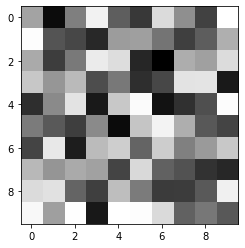

In [3]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()


x_train = np.random.rand(60000, 10, 10, 1)
x_test = np.random.rand(10000, 10, 10, 1)


print("training data x shape:", x_train.shape)
print("training data y shape:", y_train.shape)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print("training data y shape with categories:", y_train.shape)

plt.imshow(x_train[312].squeeze(), cmap=plt.cm.gray_r)
print(y_train[312])

In [4]:
x_train_normalized = x_train
x_test_normalized = x_test

#### Set input and output length for later

In [5]:
INPUT_LENGTH = x_test_normalized[1].flatten().shape[0]
OUTPUT_LENGTH = 10

### Create the model
*this can be skipped if the model file is already available*

In [6]:
def create_model(my_learning_rate, dense_unit=120):
    
    model = tf.keras.models.Sequential()
    

    model.add(layers.Flatten(input_shape=(10,10,1)))

    model.add(layers.Dense(units=dense_unit, activation='relu'))
    
    model.add(layers.Dense(units=dense_unit, activation='relu'))

    model.add(layers.Dense(units=dense_unit, activation='relu'))
    
    model.add(layers.Dense(units=dense_unit, activation='relu'))
    
    model.add(layers.Dense(units=10, activation='relu'))

    
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                 loss="categorical_crossentropy",
                 metrics=['accuracy'])
    
    model.summary()
    
    return model

In [7]:
def create_model(my_learning_rate, dense_unit=120):
    
    model = tf.keras.models.Sequential()
    

    model.add(layers.Flatten(input_shape=(10,10,1)))

    model.add(layers.Dense(units=dense_unit, activation='relu'))
    
    model.add(layers.Dense(units=450, activation='relu'))

    model.add(layers.Dense(units=dense_unit, activation='relu'))
    
    model.add(layers.Dense(units=450, activation='relu'))
    
    model.add(layers.Dense(units=10, activation='relu'))

    
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                 loss="categorical_crossentropy",
                 metrics=['accuracy'])
    
    model.summary()
    
    return model

In [8]:
def train_model(model, train_features, train_label,
               batch_size=None, validation_split=0.1):
    
    history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                        shuffle=True,
                       validation_split=validation_split)
    
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    
    return epochs, hist

#### Invoke the previous functions to build & train model.

In [9]:
dense_units = [200, 250, 300, 350, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500]
dense_units = range(440,500,1)

In [10]:
batch_size = None
learning_rate = 0.003
validation_split = 0.1

for dense_unit in dense_units:
    tf_model = create_model(learning_rate, dense_unit=dense_unit)

    #epochs, hist = train_model(tf_model, x_train_normalized, y_train,
    #                          batch_size, validation_split)

    get_flops(tf_model)
    tf_model.save('./keras-model/01ec_DenseBenchmark_varying-input_U-{:03}.h5'.format(dense_unit))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 440)               44440     
_________________________________________________________________
dense_1 (Dense)              (None, 450)               198450    
_________________________________________________________________
dense_2 (Dense)              (None, 440)               198440    
_________________________________________________________________
dense_3 (Dense)              (None, 450)               198450    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                4510      
Total params: 644,290
Trainable params: 644,290
Non-trainable params: 0
__________________________________________________

In [122]:
get_flops(tf_model)

522490

In [11]:
result = tf_model.predict(np.array( [ x_test_normalized[image_no] ] ))


In [12]:
print(result)

[[0.10513573 0.10966649 0.10023119 0.10356609 0.09327275 0.08804437
  0.10150576 0.10485981 0.09519165 0.09852624]]
